In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 30
df = pd.read_csv('allegations.csv')
#https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers

In [4]:
#This makes our dataset show 500 complaint_ids or more per precinct

df['precinct'].astype(object)
precinct_grp = df.groupby('precinct')
count = precinct_grp['complaint_id'].count()
df2 = precinct_grp.filter(lambda x: x.complaint_id.count() > 500)
df2['precinct'].astype(object)

1        67
2        67
3        67
4        67
12       79
         ..
33316    77
33317    77
33318    77
33319    77
33320    77
Name: precinct, Length: 21474, dtype: object

In [14]:
df2.columns

Index(['unique_mos_id', 'first_name', 'last_name', 'command_now',
       'complaint_id', 'month_received', 'year_received', 'month_closed',
       'year_closed', 'command_at_incident', 'rank_abbrev_incident',
       'rank_abbrev_now', 'rank_now', 'rank_incident', 'mos_ethnicity',
       'mos_gender', 'mos_age_incident', 'complainant_ethnicity',
       'complainant_gender', 'complainant_age_incident', 'fado_type',
       'allegation', 'precinct', 'contact_reason', 'outcome_description',
       'board_disposition', 'final_outcome'],
      dtype='object')

In [11]:
df2[['final_outcome','subtype']]= df2['board_disposition'].str.split(' ',n=1, expand = True)

In [13]:
df2.drop('subtype', axis=1, inplace=True)

In [365]:
df2['final_outcome'].value_counts()

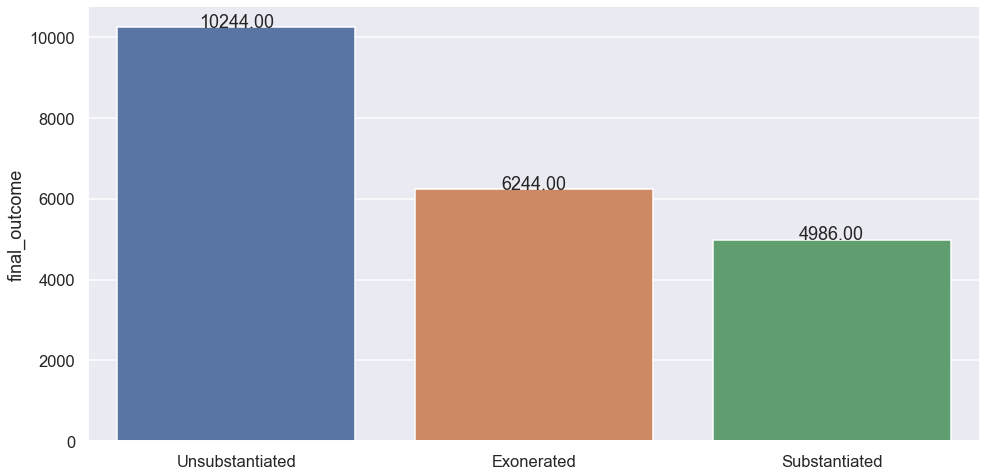

In [29]:
#count of outcome dispositions - majority remain unresolved. 
sns.set(rc={'figure.figsize': (16,8)})
sns.set_context("talk")
ax = sns.barplot(x=df2['final_outcome'].value_counts().index, y=df2['final_outcome'].value_counts())
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [21]:
#count of precints with complaint count over 1000

df2['precinct'] = df2['precinct'].astype(int)
pgroup = df2.groupby('precinct')
count = pgroup['complaint_id'].count()
mask = count > 1000
over1k = count[mask]
over1k

precinct
40    1009
44    1139
46    1120
67    1119
73    1163
75    2172
79    1062
Name: complaint_id, dtype: int64

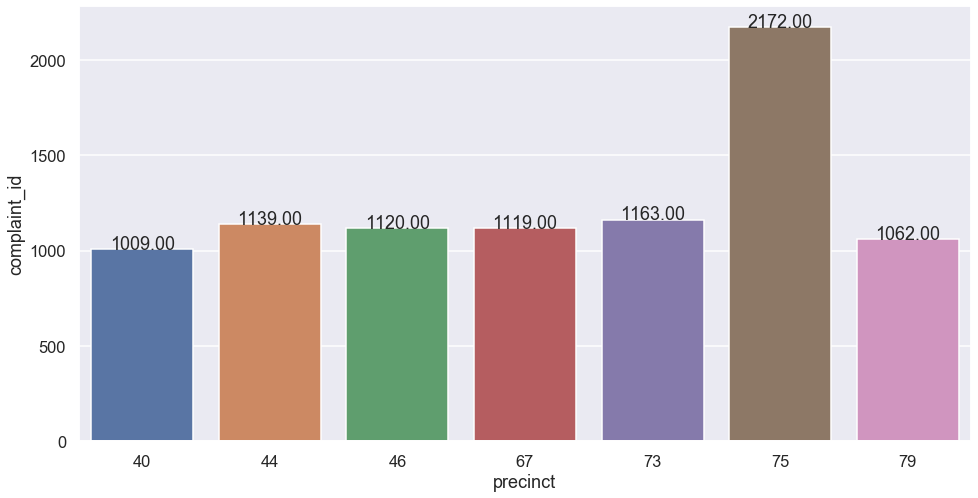

In [30]:
#Precincts with complaint_id counts over 1000. 
sns.set_context("talk")
precinct = sns.barplot(x=over1k.index, y=over1k)
for p in precinct.patches:
    precinct.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
#precinct.set_xticklabels(precinct.get_xticklabels(), rotation=45, horizontalalignment='right')

In [360]:
# count = precinct_grp['complaint_id'].count()
# count

In [361]:
# pgroup = df2.groupby('precinct')
# c = pgroup['complaint_id'].counts()
# c

# count = df2['complaint_id'].value_counts()
# count
# sns.barplot(x=df2['precinct'], y=df2['complaint_id'].value_counts())

In [32]:
#count by precinct and fado type, above 500. 

df2['precinct'] = df2['precinct'].astype(int)

pfcount = df2.groupby(['precinct', 'fado_type'])['complaint_id'].count()
mask2 = pfcount > 500
pf = pfcount[mask2]
pf


# df2['precinct'] = df2['precinct'].astype(int)
# pgroup = df2.groupby('precinct')
# count = pgroup['complaint_id'].count()
# mask = count > 1000
# over1k = count[mask]
# over1k

precinct  fado_type         
40        Abuse of Authority     577
43        Abuse of Authority     514
44        Abuse of Authority     662
46        Abuse of Authority     729
47        Abuse of Authority     558
67        Abuse of Authority     715
73        Abuse of Authority     797
75        Abuse of Authority    1362
77        Abuse of Authority     567
79        Abuse of Authority     677
120       Abuse of Authority     533
Name: complaint_id, dtype: int64

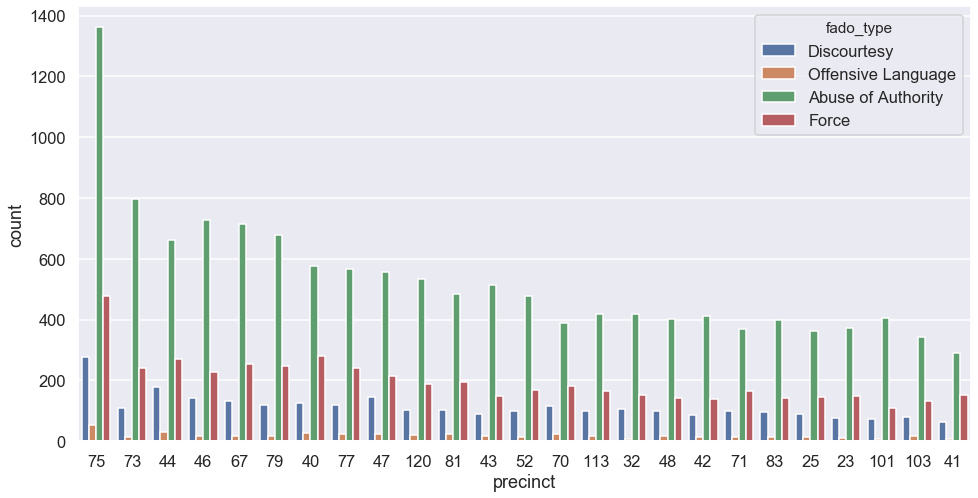

In [31]:
sns.set_context("talk")
sns.countplot(x='precinct', hue='fado_type', data = df2, order = df2['precinct'].value_counts().index)

# order = titanic['class'].value_counts().index)